In [1]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [2]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.15)

In [3]:
xgbr = XGBRegressor(verbosity=0)
cgbr = CatBoostRegressor(verbose=0)
lgbr = LGBMRegressor(verbosity=-1)

In [4]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [5]:
cgbr.fit(xtrain, ytrain)

In [6]:
lgbr.fit(xtrain, ytrain)

LGBMRegressor(verbosity=-1)

In [7]:
xgbr_score = xgbr.score(xtrain, ytrain)
cbgr_score = cgbr.score(xtrain, ytrain)
lgbr_score = lgbr.score(xtrain, ytrain)

In [8]:
# cross validation score 
cv_score_xgb = cross_val_score(xgbr, xtrain, ytrain, cv=10)
cv_score_catboost = cross_val_score(cgbr, xtrain, ytrain, cv=10)
cv_score_lgbm = cross_val_score(lgbr, xtrain, ytrain, cv=10)

In [9]:
# predictions 
ypred_xgbr = xgbr.predict(xtest)
ypred_cgbr = cgbr.predict(xtest)
ypred_lgbr = lgbr.predict(xtest)

In [10]:
# rmse 
xgb_rmse = mean_squared_error(ytest, ypred_xgbr) ** .5 
cgbr_rmse = mean_squared_error(ytest, ypred_cgbr) ** .5
lgbr_rmse = mean_squared_error(ytest, ypred_lgbr) ** .5

In [11]:
print(f'Training scores\nXGBoost  : {xgbr_score}\nCatboost : {cbgr_score}\nLightGBM : {lgbr_score}')

Training scores
XGBoost  : 0.9999944217299509
Catboost : 0.9964853276947163
LightGBM : 0.9793836347909062


In [12]:
print(f'Cross Validation Scores\nXGBoost  : {cv_score_xgb}\nCatboost : {cv_score_catboost}\nLightGBM : {cv_score_lgbm}')

Cross Validation Scores
XGBoost  : [0.90470974 0.92277723 0.91420184 0.88374004 0.94207116 0.80412856
 0.86729421 0.73125702 0.92724804 0.86438031]
Catboost : [0.9380147  0.93185828 0.91725896 0.90868546 0.9522437  0.80669121
 0.84034501 0.8247557  0.9327998  0.85429389]
LightGBM : [0.91951808 0.930003   0.8554685  0.90663289 0.92083425 0.83974114
 0.82936786 0.75022951 0.92355116 0.85884981]


In [13]:
print(f'RMSE\nXGBoost  : {xgb_rmse}\nCatboost : {cgbr_rmse}\nLightGBM : {lgbr_rmse}')

RMSE
XGBoost  : 2.6992307077073368
Catboost : 2.431995798427203
LightGBM : 2.7509972693311444


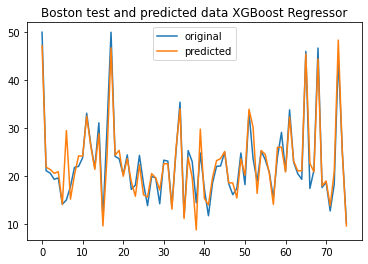

In [14]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label = 'original')
plt.plot(x_ax, ypred_xgbr, label="predicted")
plt.title("Boston test and predicted data XGBoost Regressor")
plt.legend()
plt.show()

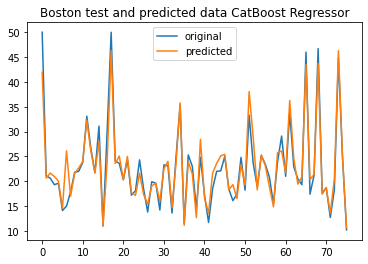

In [15]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label = 'original')
plt.plot(x_ax, ypred_cgbr, label="predicted")
plt.title("Boston test and predicted data CatBoost Regressor")
plt.legend()
plt.show()

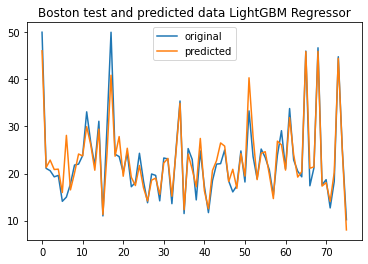

In [16]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label = 'original')
plt.plot(x_ax, ypred_lgbr, label="predicted")
plt.title("Boston test and predicted data LightGBM Regressor")
plt.legend()
plt.show()